In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Define path for data file




---

In [ ]:
jokes_df = pd.read_csv('/content/sample_data/jokes_base_data.csv')

In [ ]:
print(jokes_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Joke    746 non-null    object
dtypes: object(1)
memory usage: 6.0+ KB
None


In [ ]:
print("Column Names:", jokes_df.columns)

Column Names: Index(['Joke'], dtype='object')


Converting the data into readable list format

---



In [ ]:
jokes_list = jokes_df['Joke'].tolist()

In [ ]:
print(jokes_list)

["I'm tired of following my dreams. I'm just going to ask them where they are going and meet up with them later. \t", "Did you hear about the guy whose whole left side was cut off? He's all right now. \t", 'Why didn’t the skeleton cross the road? Because he had no guts. \t', "What did one nut say as he chased another nut?  I'm a cashew! \t", 'Where do fish keep their money? In the riverbank \t', 'I accidentally took my cats meds last night. Don’t ask meow. \t', "Chances are if you' ve seen one shopping center, you've seen a mall. \t", 'Dermatologists are always in a hurry. They spend all day making rash decisions.  \t', "I knew I shouldn't steal a mixer from work, but it was a whisk I was willing to take. \t", 'I won an argument with a weather forecaster once. His logic was cloudy... \t', 'How come the stadium got hot after the game? Because all of the fans left. \t', '"Why do seagulls fly over the ocean?" "Because if they flew over the bay, we\'d call them bagels." \t', 'Why was it ca

### **Tokenization** :  Defining `Tokenizer()` to convert the text into sequences

---



In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(jokes_list)
total_words = len(tokenizer.word_index) + 1

In [ ]:
#converting text to sequence
input_sequences = []
for line in jokes_list:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

In [ ]:
print(type(jokes_list))


<class 'list'>


In [ ]:
jokes_list = pd.DataFrame(jokes_list)

### **Removing Stop Words**

---

In [ ]:
import nltk
nltk.download('stopwords')
def threeLetters(listOfTokens):
    threeLetterWord = []
    for token in listOfTokens:
        if len(token) <= 3 or len(token) >= 21:
            threeLetterWord.append(token)
    return threeLetterWord

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from nltk.corpus import stopwords
def removeWords(listOfTokens):
  return [token for token in listOfTokens if token not in stopwords.words('english')]
jokes_df['Joke'] = jokes_df['Joke'].apply(removeWords)


In [ ]:
jokes_df['Joke']

0      [I, ',  , r, e,  , f,  , f, l, l, w, n, g,  , ...
1      [D,  , u,  , h, e, r,  , b, u,  , h, e,  , g, ...
2      [W, h,  , n, ’,  , h, e,  , k, e, l, e, n,  , ...
3      [W, h,  ,  , n, e,  , n, u,  ,  ,  , h, e,  , ...
4      [W, h, e, r, e,  ,  , f, h,  , k, e, e, p,  , ...
                             ...                        
741    [W, h,  ,  , u,  , c, l, l,  ,  , g, r, l, l, ...
742    [H, v, e,  , u,  , h, e, r,  , b, u,  , c, r, ...
743    [W, h,  , w,  , h, e,  , h,  , b, k,  , ?,  , ...
744    [P, r, l, l, e, l,  , l, n, e,  , h, v, e,  , ...
745    [I,  , l,  ,  , w, f, e,  , h, e,  , w,  , r, ...
Name: Joke, Length: 746, dtype: object

### **Stemming** : Normalizing words in the corpus with similar meanings.

---



In [ ]:
from nltk import SnowballStemmer
stemmer = SnowballStemmer('english')

def applyStemming(listOfTokens):
    return [stemmer.stem(token) for token in listOfTokens]

jokes_df['Joke'] = jokes_df['Joke'].apply(applyStemming)

In [ ]:
jokes_list.head()

,0
0,I'm tired of following my dreams. I'm just goi...
1,Did you hear about the guy whose whole left si...
2,Why didn’t the skeleton cross the road? Becaus...
3,What did one nut say as he chased another nut?...
4,Where do fish keep their money? In the riverba...


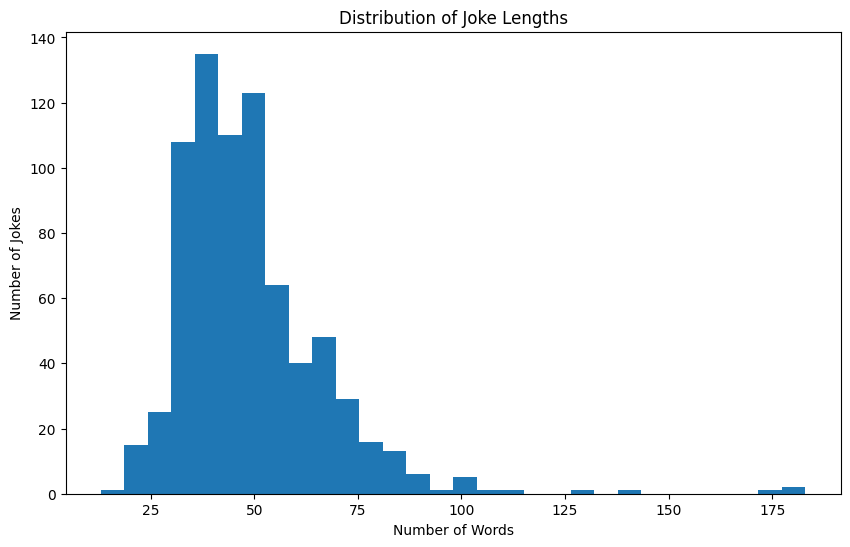

In [ ]:
joke_lengths = jokes_df['Joke'].apply(lambda x: len(x) if isinstance(x, list) else len(x.split()))

plt.figure(figsize=(10, 6))
plt.hist(joke_lengths, bins=30)
plt.title('Distribution of Joke Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Number of Jokes')
plt.show()

### **Padding Sequences** : It will pad any given sequences to the desired maximum length.

---



In [ ]:
max_sequence_length = max(len(seq) for seq in input_sequences)
padded_sequences = pad_sequences(input_sequences, maxlen=max_sequence_length, padding='pre')

In [ ]:
x, y = padded_sequences[:, :-1], padded_sequences[:, -1]
y = tf.keras.utils.to_categorical(y, num_classes=total_words)

### **Creating the Model**

---



In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=total_words, output_dim=100, input_length=max_sequence_length-1),
    tf.keras.layers.LSTM(100),
    tf.keras.layers.Dense(total_words, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


### **Training the Model**

---



In [ ]:
model.fit(x, y, epochs=100, verbose=1)

Epoch 1/100
308/308 [==============================] - 19s 53ms/step - loss: 6.7716 - accuracy: 0.0495
Epoch 2/100
308/308 [==============================] - 16s 51ms/step - loss: 6.2467 - accuracy: 0.0558
Epoch 3/100
308/308 [==============================] - 16s 51ms/step - loss: 6.0330 - accuracy: 0.0690
Epoch 4/100
308/308 [==============================] - 17s 54ms/step - loss: 5.8063 - accuracy: 0.0879
Epoch 5/100
308/308 [==============================] - 17s 54ms/step - loss: 5.5696 - accuracy: 0.1146
Epoch 6/100
308/308 [==============================] - 16s 53ms/step - loss: 5.3403 - accuracy: 0.1321
Epoch 7/100
308/308 [==============================] - 17s 55ms/step - loss: 5.1148 - accuracy: 0.1499
Epoch 8/100
308/308 [==============================] - 16s 52ms/step - loss: 4.8953 - accuracy: 0.1660
Epoch 9/100
308/308 [==============================] - 16s 52ms/step - loss: 4.6825 - accuracy: 0.1815
Epoch 10/100
308/308 [==============================] - 17s 55ms/step - l

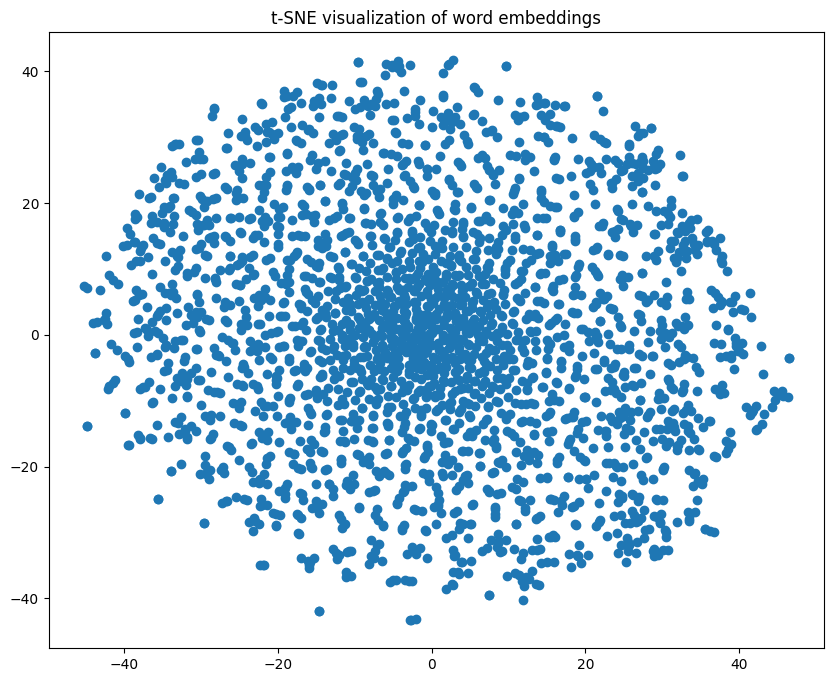

In [ ]:
from sklearn.manifold import TSNE
embeddings = model.layers[0].get_weights()[0]
tsne = TSNE(n_components=2, random_state=0)
words_compressed = tsne.fit_transform(embeddings)

plt.figure(figsize=(10, 8))
plt.scatter(words_compressed[:, 0], words_compressed[:, 1])
plt.title('t-SNE visualization of word embeddings')
plt.show()

### **Function to generate a Joke**

---



In [ ]:
def generate_joke(seed_text, next_words, model, max_sequence_len):
  for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted_probs = model.predict(token_list, verbose=0)

        # Choose the word with the highest probability
        predicted_index = np.argmax(predicted_probs)

        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted_index:
                output_word = word
                break
        seed_text += " " + output_word
  return seed_text

In [ ]:
seed_text = "What do you call someone"
generated_joke = generate_joke(seed_text, next_words=5, model=model, max_sequence_len=max_sequence_length)
print("Generated Joke:", generated_joke)

Generated Joke: What do you call someone with no nose nobody knows
